<a href="https://colab.research.google.com/github/PsorTheDoctor/deep-neural-nets/blob/main/week2_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear classifiers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Binomial

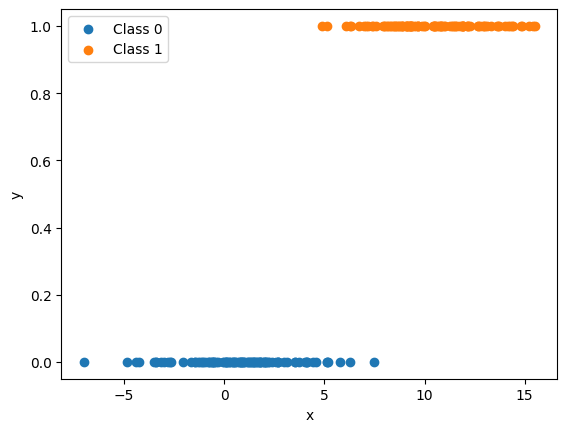

In [ ]:
n = 100
c0 = np.random.normal(loc=1, scale=2.5, size=(1, n))
c1 = np.random.normal(loc=10, scale=2.5, size=(1, n))

plt.scatter(c0, np.zeros_like(c0), label='Class 0')
plt.scatter(c1, np.ones_like(c1), label='Class 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Fit model

Implement the optimization loop:


*   Compute the avg. log-likelihood and report it
*   Compute the avg. gradient g (2x1)
*   Update w by adding g
*   (Repeat many times)

Plot your resulting fit over [-10, 20]

* Use np.arange(-10,20,0.1) for the x-values
* Then evaluate your fitted sigmoid to get y-values
* What’s the probability that x = 5 belongs to class 1?



In [ ]:
# for learning include 1 as the bias parameter
x = np.concatenate((
    np.ones((1, 2 * n)),  # (1, 2n)
    np.concatenate((c0, c1), axis=1)  # (1, 2n)
), axis=0)  # (2, 2n)

y = np.concatenate((
    np.zeros((1, n)),
    np.ones((1, n))
), axis=1)  # (1, 2 * n)

# randomly initialize weights
w = np.random.randn(2, 1)

print(x.shape)
print(y.shape)
print(w.shape)

(2, 200)
(1, 200)
(2, 1)


<ipython-input-68-4e8c0ee52c0d>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
<ipython-input-68-4e8c0ee52c0d>:13: RuntimeWarning: divide by zero encountered in log
  log_likelihood = y @ np.log(sigmoid(a)).T + (1 - y) @ np.log(1 - sigmoid(a)).T
<ipython-input-68-4e8c0ee52c0d>:13: RuntimeWarning: invalid value encountered in matmul
  log_likelihood = y @ np.log(sigmoid(a)).T + (1 - y) @ np.log(1 - sigmoid(a)).T


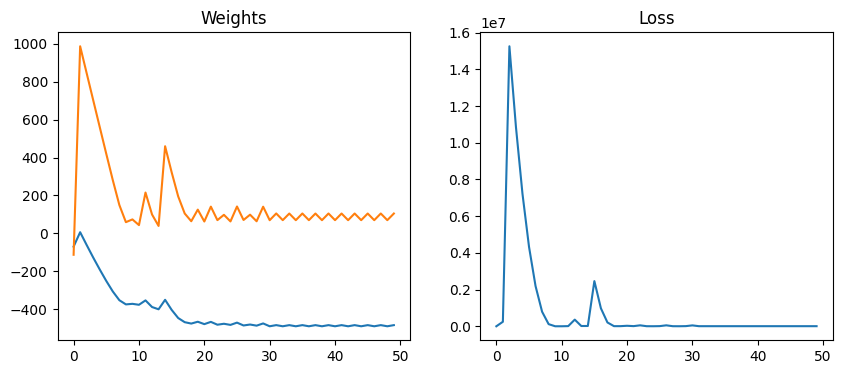

In [ ]:
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

epochs = 50
weights = []
log_likelihoods = []
losses = []

for _ in range(epochs):
  weights.append(w)

  a = w.T @ x
  log_likelihood = y @ np.log(sigmoid(a)).T + (1 - y) @ np.log(1 - sigmoid(a)).T
  log_likelihoods.append(log_likelihood)

  gradient1 = (y - sigmoid(w.T @ x)) @ x[0]
  gradient2 = (y - sigmoid(w.T @ x)) @ x[1]

  w[0] += np.mean(gradient1)
  w[1] += np.mean(gradient2)
  w = np.array([w[0], w[1]])

  loss = 0.5 * np.power(np.mean(y) - np.mean(a), 2)
  losses.append(loss)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].set_title('Weights')
ax[0].plot(np.array(weights)[:, 0])
ax[0].plot(np.array(weights)[:, 1])
ax[1].set_title('Loss')
ax[1].plot(losses)

## Multinomial (softmax)

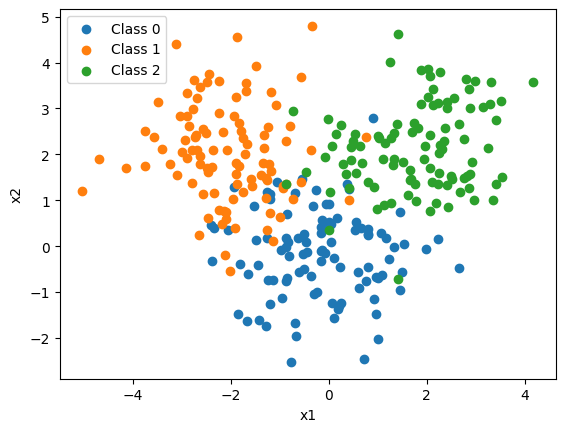

In [ ]:
c0 = np.random.multivariate_normal([0, 0], np.eye(2), n).T  # (2, 100)
c1 = np.random.multivariate_normal([-2, 2], np.eye(2), n).T
c2 = np.random.multivariate_normal([2, 2], np.eye(2), n).T

plt.scatter(*c0, label='Class 0')
plt.scatter(*c1, label='Class 1')
plt.scatter(*c2, label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

#### Fit model

Just like before
* Compute current softmax output using W and X (a 3xm data matrix )
* Compute the avg. log-likelihood
* Compute the avg. gradient (a 3x3 matrix)
* Update W

What classification rate do you get?

In [ ]:
# Stack and add a 1 for the bias
x = np.concatenate((
    np.ones((1, 3 * n)),  # (1, 300)
    np.concatenate((c0, c1, c2), axis=1)  # (2, 300)
), axis=0)  # (3, 300)

# Use one-hot encoding for the labels
y = np.zeros((3, 3 * n))
y[0, :n] = 1
y[1, n:2 * n] = 1
y[2, 2 * n:] = 1

# Initialize parameters
w = np.random.randn(3, 3)

print(x.shape)
print(y.shape)
print(w.shape)

(3, 300)
(3, 300)
(3, 3)


In [ ]:
def softmax(a):
  denominator = 0
  for i in range(a.shape[0]): # number of classes (3)
    denominator += np.exp(a[i])
  return np.exp(a) / denominator

for _ in range(epochs):
  a = w.T @ x
  gradient = (y - softmax(w.T @ x)) @ x.T
  w += np.mean(gradient)

w

array([[-0.2598037 ,  0.43449158, -0.4123435 ],
       [-0.16693671, -1.07240272, -2.11257189],
       [ 0.31852613,  0.58846056,  0.71791625]])

## Now lets try out on MNIST data

In [ ]:
import torch
from torchvision import datasets
import sklearn.preprocessing
from tqdm.notebook import tqdm

mnist_train_dataset = datasets.MNIST('', train=True, download=True)
mnist_test_dataset = datasets.MNIST('', train=False, download=True)

x_train = np.array(mnist_train_dataset.data)
y_train = np.array(mnist_train_dataset.targets)

x_test = np.array(mnist_test_dataset.data)
y_test = np.array(mnist_test_dataset.targets)

In [ ]:
# One-hot encode labels
y_train = sklearn.preprocessing.label_binarize(y_train, classes=range(10))
y_test = sklearn.preprocessing.label_binarize(y_test, classes=range(10))

# Normalize images
x_train, x_test = x_train / 255 - 0.5, x_test / 255 - 0.5

# Vectorize
d_data = np.prod(x_train.shape[1:])
x_train = x_train.reshape((-1, d_data))
x_test = x_test.reshape((-1, d_data))

# Store images/labels in columns
x_train, y_train, x_test, y_test = x_train.T, y_train.T, x_test.T, y_test.T

# Add bias term
x_train = np.concatenate((np.ones((1, 60000)), x_train), axis=0)
x_test = np.concatenate((np.ones((1, 10000)), x_test), axis=0)
d_data += 1

# Initialize parameters
w = np.random.randn(d_data, 10) * 1e-2

In [ ]:
epochs = 50
for _ in range(epochs):
  a = w.T @ x_train
  gradient = (y_train - softmax(w.T @ x_train)) @ x_train.T
  w += np.mean(gradient)

## Evaluate prediction

In [ ]:
y_hat = w.T @ x_test

correct_count = 0
total = y_test.shape[1]

for i in range(total):
  if np.argmax(y_hat[:, i]) == np.argmax(y_test[:, i]):
    correct_count += 1

correct_count / total

0.0952